# Churn Analysis

A big topic in digital marketing can be the focus on  customers you can also keep. This is the subject of churn analysis.

Customer churn (most commonly called 'churn') is defined in the article as customers that stop doing business with a company or a service. So, for instance, which costumer will move to a different mobile provider? 

This churn analysis is key to customer relationship management (CRM).

Churn analysis is based on data that contains information on previous customers who churned. We want to compare the current costumers with these to find out whether they might churn, too? Sounds familiar? It's basically a typical case for a decision classification - just like the wine tasting or the Titanic data. 

This notebook will demonstrate to you that we can use the same kind of modelling techniques we used for wines, the titanic, etc. with digital marketing data. Churn analysis is a typical use case of algorithmic decision-making.

## Bank Use Case

A typical example of churn analysis is to find costumers who defaulted on a loan in a bank. Let's load the churn data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

churnData = pd.read_csv("churnData.csv")
churnData.describe()

,ID,limitBal,sex,education,marriage,age,pay1,pay2,pay3,pay4,...,billAmt4,billAmt5,billAmt6,payAmt1,payAmt2,payAmt3,payAmt4,payAmt5,payAmt6,PaymentDefault
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,162902.426667,1.587556,1.835500,1.559500,35.475556,0.027833,-0.101667,-0.129389,-0.197389,...,41074.180056,39397.784333,38009.251611,5532.254278,5.731058e+03,4629.137611,4757.224389,4763.706833,5134.710611,0.230556
std,5196.296758,129503.322618,0.492288,0.767843,0.523585,9.294161,1.120523,1.205068,1.214110,1.167596,...,61496.859401,59296.708143,58766.741569,15470.010126,2.187441e+04,15538.875970,15417.365689,15469.890364,17745.237186,0.421200
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-37594.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2244.750000,1683.750000,1150.000000,949.000000,6.960000e+02,307.000000,228.000000,209.750000,2.000000,0.000000
50%,9000.500000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18702.500000,18045.500000,16780.000000,2087.000000,2.000000e+03,1500.000000,1486.000000,1500.000000,1400.000000,0.000000
75%,13500.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50540.250000,49355.250000,48442.250000,5000.000000,5.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,18000.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


There is a lot of information in this dataset! We are mainly interested in PaymentDefault. PaymentDefault = 1 if the costumer defaulted on the payment and 0 otherwise.

<AxesSubplot:ylabel='Frequency'>

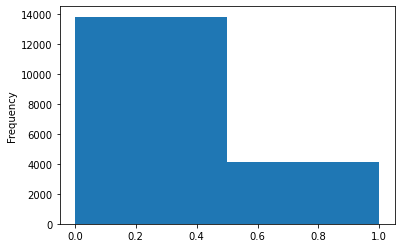

In [2]:
churnData['PaymentDefault'].plot.hist(bins=2)

## Modelling

Let's build a logistic regression model next to find out what in the data helps us predict the default on a loan. It's just another model to predict a target that is categorical.

For example:
- To predict whether an email is spam (1) or (0)
- Whether the tumor is malignant (1) or not (0)

In our case, we use the model to understand which features contribute most to a potential default.

glm stands for Generalized Linear Models with family=binomial indicating a logistic model: https://www.statmethods.net/advstats/glm.html

In [3]:
import statsmodels.api as sm

X = churnData[['limitBal', 'sex', 'education', 'marriage',
                   'age', 'pay1', 'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'billAmt1', 
                   'billAmt2', 'billAmt3', 'billAmt4', 'billAmt5', 'billAmt6', 'payAmt1', 
                   'payAmt2', 'payAmt3', 'payAmt4', 'payAmt5', 'payAmt6']]
Y = churnData['PaymentDefault']
X = sm.add_constant(X)

model = sm.GLM(Y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                 Generalized Linear Model Regression Results                  
Dep. Variable:         PaymentDefault   No. Observations:                18000
Model:                            GLM   Df Residuals:                    17976
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                         0.15630
Method:                          IRLS   Log-Likelihood:                -8825.3
Date:                Mon, 08 Nov 2021   Deviance:                       2809.7
Time:                        12:27:10   Pearson chi2:                 2.81e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3394      0.023     14.481      0.0

You might have noticed that we have not discriminated test and training datasets to build the model, as we are less interested at this moment in the prediction the model can develop, but in the kind of features which are important to predict default. These are the characteristics in customers we want to watch out for.


According to lm, education is really important to understand default as are sex and the order of payments.

In [4]:
# source: https://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [5]:
model = forward_selected(churnData, 'PaymentDefault')

print(model.model.formula)

print(model.rsquared_adj)

PaymentDefault ~ pay1 + billAmt1 + pay3 + payAmt1 + marriage + pay5 + education + pay2 + billAmt2 + age + limitBal + payAmt2 + sex + payAmt4 + ID + 1
0.11927288475507825


We are left with pay1 + billAmt1 + pay3 + payAmt1 + marriage + pay5 + education + pay2 + billAmt2 + age + limitBal + payAmt2 + sex + payAmt4 as the important features

## Prediction

Of course we can also use the model to create the predictions we already know about now. Let's try again the full data set first.

Confusionmatrix

In [6]:
X_aic = X[['limitBal', 'sex', 'education', 'marriage',
                   'age', 'pay1', 'pay2', 'pay3', 'pay5', 'billAmt1', 
                   'billAmt2', 'payAmt1',
                   'payAmt2', 'payAmt4']]

In [7]:
X_aic = sm.add_constant(X_aic)
model = sm.GLM(Y, X_aic).fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
preds = model.predict()

def to_binary(predictions, thresh):
    threshold = thresh
    binary = []
    for item in predictions:
        if item < threshold:
            item = 0
        else:
            item = 1
        binary.append(item)
    return binary

binary = to_binary(preds, 0.5)

In [9]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
cm = confusion_matrix(binary, Y)
acc = accuracy_score(Y, binary)

print('CM:', cm)
print('Accuracy:', acc)

CM: [[13605  3519]
 [  245   631]]
Accuracy: 0.7908888888888889


The prediction accuracy is not too bad with 0.80. 

Looking at the confusion matrix, it seems that the model mainly has problems to identify cases where the original value was 0 or no payment default. In ~3519 cases, it assumed that there would be a default. This means that customers would be unnecessarily targeted. In the case of bank defaults, this might upset these costumers. So, we should try and reduce this value.

### Model Improvements by Lowering the Threshold

One way to do this is to introduce a less severe threshold for suspecting defaults on payments. This will avoid customer dissatisfaction. If you check the above formula for prediction we introduced a threshold of 0.5 in the prediction. All values below 0.5 are 0 (= no default) and above 0.5 they are 1 (default).

We can do this, aspredict actually returns a value between 0 and 1. Take a look at the value of the first prediction and you will see a value of ~0.45 - pretty close to the threshold of 0.5.

In [10]:
print(preds[0])

0.4487605241323452


What if try out different threshold, can we improve the prediction by being less strict or maybe we should consider even more cases for payment default and lower the threshold?

We need to make a decision what kind of case we would like to avoid. If you recall our discussion earlier of the confusion matrix, we want to avoid the case where we predicted no default but the default really did happen. We want to reward, however, the case where we predicted no-default and the costumer really do not default.  We can access the confusion matrix results with cm as well as the specific cells in the matrix.

Check it out:

In [11]:
print(cm)
print(cm[0,0])
print(cm[1,0])

[[13605  3519]
 [  245   631]]
13605
245


It's time to play with the results using the threshold. 

Let's say we define a score function: score <- cm[1,1]*250 + cm[1,1]*250 - cm[1,2]*1000 - cm[1,2]*1000. What does this say? It says that we want to reward the right prediction with a factor of 250 but apply a penalty of -1000 for the wrong prediction. We use a much higher value for the wrong prediction as we are concerned about customer dissatisfaction if we target too many people.

Now, we try a brute-force test using the the a number of threshold between 0.1 and 0.5.

In [12]:
thresholds = [0.1,0.2,0.3,0.4,0.5]

for t in thresholds:
    bin_preds = to_binary(preds, t)
    cm = confusion_matrix(bin_preds, Y)
    score = cm[0,0]*250 + cm[1,1]*250 - cm[1,0]*1000 - cm[0,1]*1000
    print(t, score)
    

0.1 -10460000


0.2 -6327500
0.3 -460000
0.4 163750
0.5 -205000


Great! That wasn't easy! Take your time going through the details. 

You could see that the optimal threshold is 0.4. It has the best score.

Let's use this threshold and do some real prediction next with a test and training data. 

Following our experience with the wine data, we know that the dataset contains 18,000 entries. Splitting this up into 70-30 training and test data, implies:

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(churnData, train_size=0.7)

We copy the optimal formula from the AIC test and run:

In [14]:
X_train = train[['limitBal', 'sex', 'education', 'marriage',
                   'age', 'pay1', 'pay2', 'pay3', 'pay5', 'billAmt1', 
                   'billAmt2', 'payAmt1',
                   'payAmt2', 'payAmt4']]
Y_train = train['PaymentDefault']
Y_test = test['PaymentDefault']
X_test = test[['limitBal', 'sex', 'education', 'marriage',
                   'age', 'pay1', 'pay2', 'pay3', 'pay5', 'billAmt1', 
                   'billAmt2', 'payAmt1',
                   'payAmt2', 'payAmt4']]

model = sm.GLM(Y_train, X_train).fit()
Y_pred = model.predict(X_test) 


In [15]:
binary = to_binary(Y_pred, 0.4)

cm = confusion_matrix(binary, Y_test)
acc = accuracy_score(Y_test, binary)
print(cm, acc)

[[3927  808]
 [ 238  427]] 0.8062962962962963


Using our optimal threshold 0.4, we improved the accuracy slightly to 0.804. But we significantly improved the cases where customers wrongly targeted to 814 cases in total.